## Setup

In [2]:
%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os
import datetime

import functools
import IPython
import IPython.display
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import tensorflow as tf


import glucose_ts

# plot layouts
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 3.5, 'figsize': (20, 20)})
sns.color_palette("dark")

plt.subplots_adjust(wspace=1.5)
DATA_DIR = os.path.join(os.path.dirname(os.path.dirname(glucose_ts.__file__)), 'data')


<Figure size 432x288 with 0 Axes>

## Load and Normalize the data


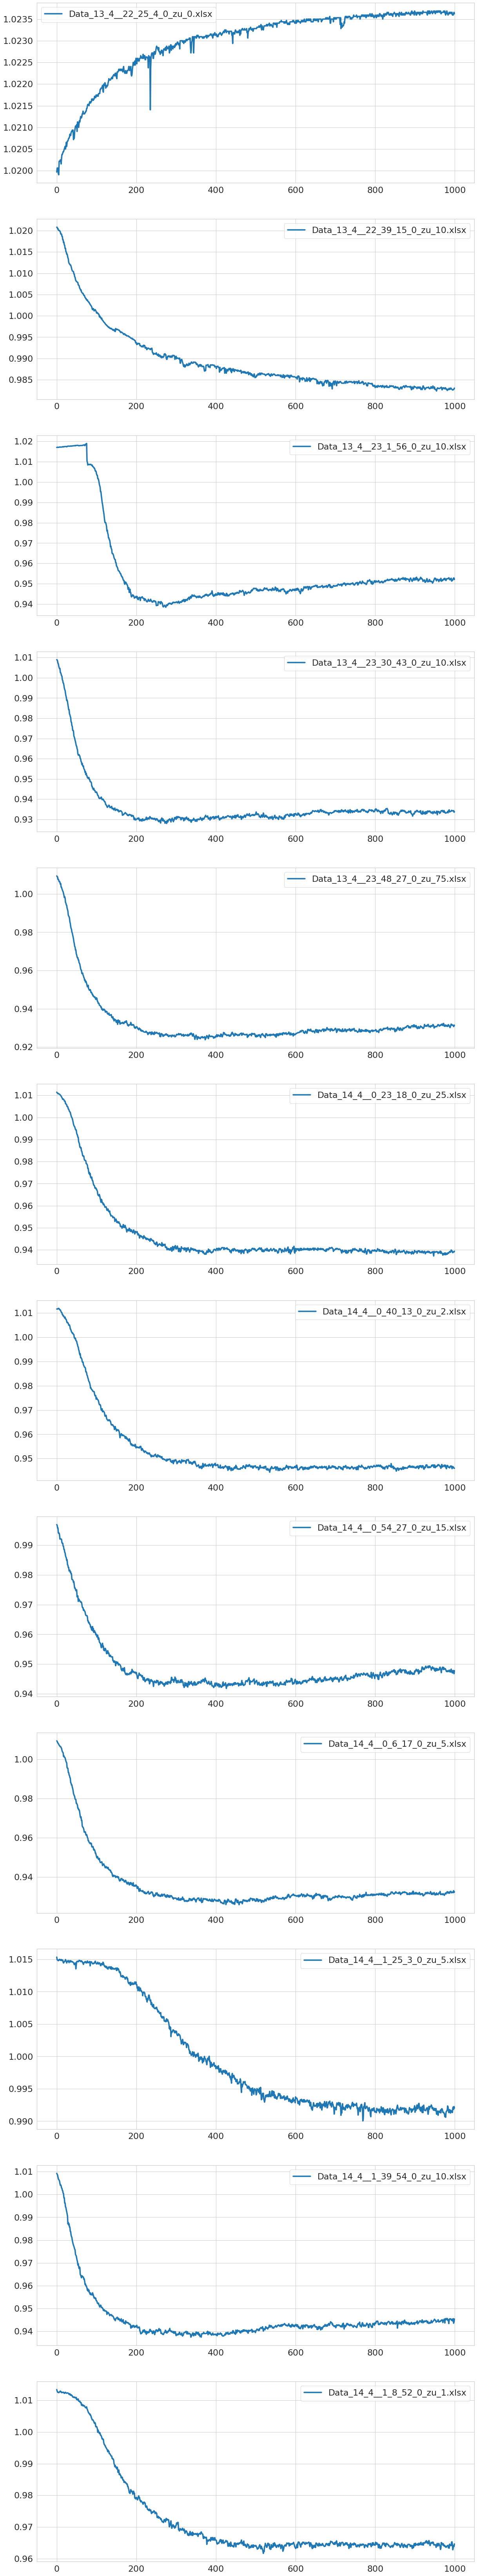

In [3]:

path = '/home/christoph/Downloads/BatchCult'

files = sorted([
    os.path.join(path, one) for one in tuple(os.walk(path))[0][2]
    if one.endswith('xlsx') and one.startswith('Data')
])

fig, axises = plt.subplots(
    len(files),
    1,
    figsize=(20, 10 * len(files))
)

for file_name, ax in zip(files, axises.flatten()):
    
    series = glucose_ts.data.read_glucose_ts(file_name)
    
    ax.plot(range(1000), series.voltages, label=file_name.split('/')[-1])
    ax.legend()


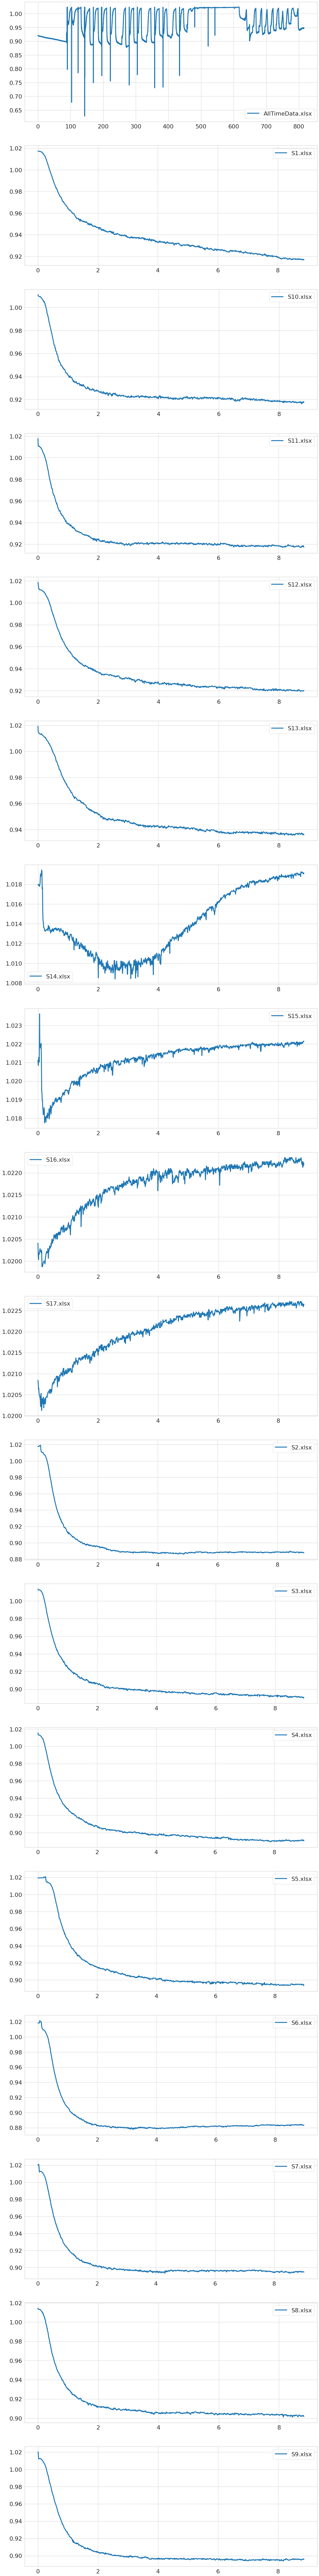

In [5]:

path = '/home/christoph/Downloads/BatchCult'

files = sorted([
    os.path.join(path, one) for one in tuple(os.walk(path))[0][2]
    if one.endswith('xlsx') and not one.startswith('Data')
])

fig, axises = plt.subplots(
    len(files),
    1,
    figsize=(20, 10 * len(files))
)

for file_name, ax in zip(files, axises.flatten()):
    
    series = glucose_ts.data.read_glucose_ts(file_name)
    
    ax.plot(series.points_in_time, series.voltages, label=file_name.split('/')[-1])
    ax.legend()


In [18]:
5 % 4

1

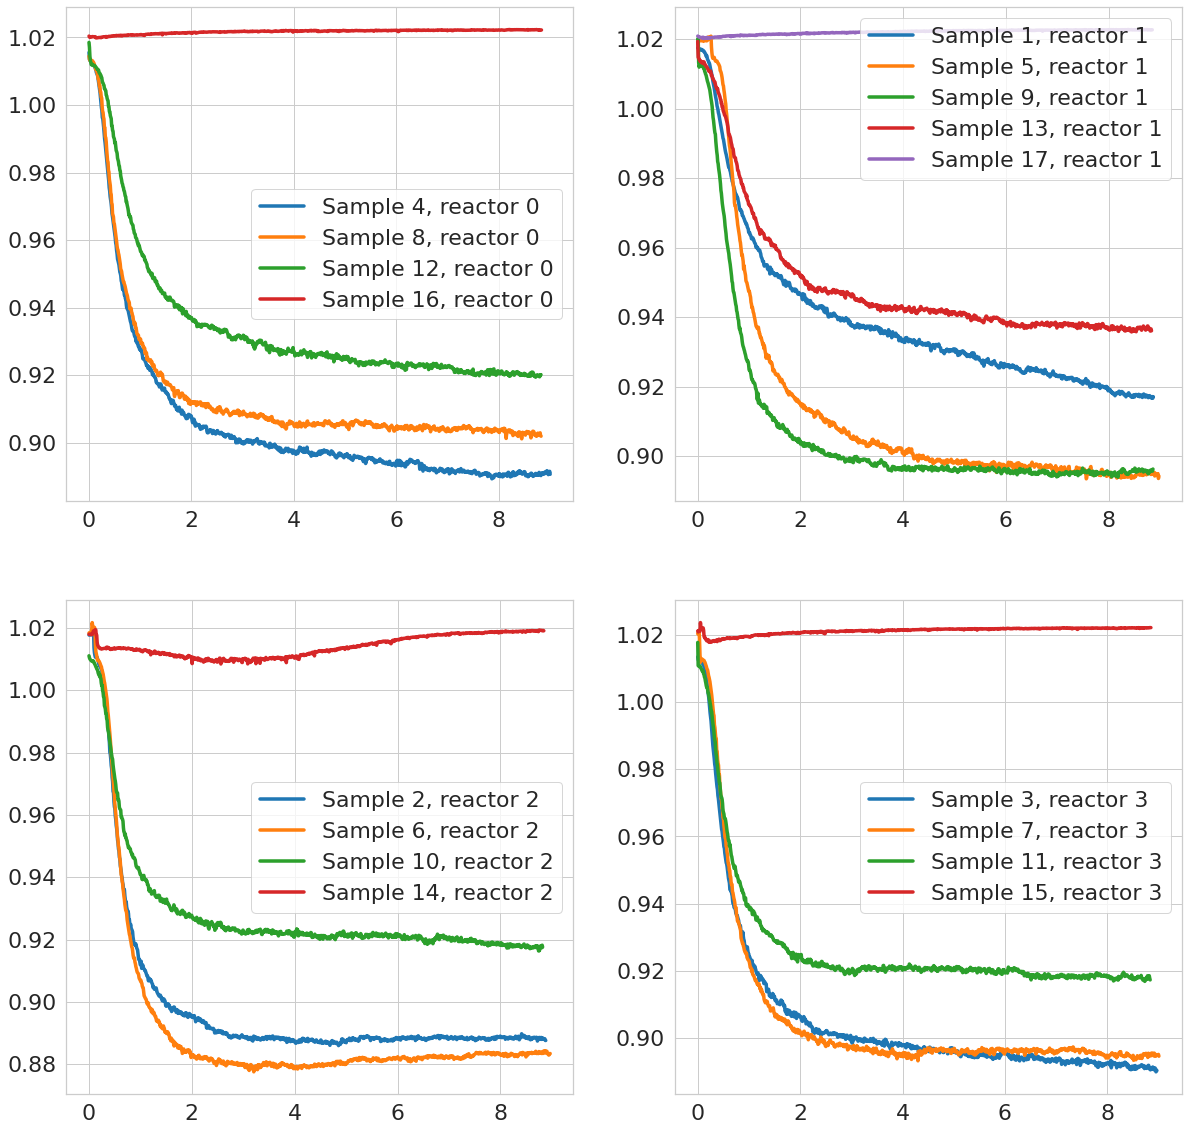

In [23]:

path = '/home/christoph/Downloads/BatchCult'

files = sorted([
    os.path.join(path, one) for one in tuple(os.walk(path))[0][2]
    if one.endswith('xlsx') and not one.startswith('Data') and not one.startswith('AllTime')
])

fig, axises = plt.subplots(
    2,
    2,
    figsize=(20, 20)
)

file_numbers = list(range(1, 18))

for reactor_idx, ax in enumerate(axises.flatten()):
    
    for sample_idx in [sample for sample in file_numbers if sample % 4 == reactor_idx]:
        series = glucose_ts.data.read_glucose_ts(
            os.path.join(
                path,
                'S%s.xlsx' % sample_idx
            )
        )

        ax.plot(
            series.points_in_time,
            series.voltages,
            label='Sample %s, reactor %s' % (sample_idx, reactor_idx)
        )
    ax.legend()
    
fig.savefig(
    os.path.join(
        os.path.dirname(os.path.dirname(glucose_ts.__file__)),
        'presentations',
        'htbd_first_results',
        'images',
        'plots_per_reactor.png'
    ),
    transparent=True,
)


In [12]:
files = [
    (
        os.path.join(os.path.dirname(os.path.dirname(glucose_ts.__file__)), 'data', 'calibration', one),
        float(one.split('_')[0])
    )
    for one in os.listdir(
        os.path.join(os.path.dirname(os.path.dirname(glucose_ts.__file__)), 'data', 'calibration')
    )
    if one.endswith('xlsx')
]

for (file, concentration) in files:
    
    df = pd.read_excel(file, engine='openpyxl')
    df['RealConcentration'] = concentration
    df.to_csv('%s.csv' % file.split('.xlsx')[0])


In [10]:
'1.0_abcd.xlsx'.split('.xlsx')

['1.0_abcd', '']

In [7]:
pd.read_excel('/home/christoph/git_projects/glucose-prediction/data/calibration/0.5_g_per_liter.xlsx', engine='openpyxl')

,Unnamed: 0,Time,ValueRAW,Value,RealConcentration,PreConc
0,0,2021-04-14 01:16:13.839,32491,1015.34375,5,0
1,1,2021-04-14 01:16:14.360,32478,1014.93750,5,0
2,2,2021-04-14 01:16:14.882,32477,1014.90625,5,0
3,3,2021-04-14 01:16:15.406,32475,1014.84375,5,0
4,4,2021-04-14 01:16:15.929,32473,1014.78125,5,0
...,...,...,...,...,...,...
995,995,2021-04-14 01:25:00.671,31745,992.03125,5,0
996,996,2021-04-14 01:25:01.212,31750,992.18750,5,0
997,997,2021-04-14 01:25:01.737,31738,991.81250,5,0
998,998,2021-04-14 01:25:02.277,31752,992.25000,5,0


In [14]:
pd.read_csv('/home/christoph/git_projects/glucose-prediction/data/calibration/0.0_g_per_liter.csv')

,Unnamed: 0,Unnamed: 0.1,Time,ValueRAW,Value,RealConcentration,PreConc
0,0,0,2021-04-13 22:16:09.885,32639,1019.96875,0.0,0
1,1,1,2021-04-13 22:16:10.408,32642,1020.06250,0.0,0
2,2,2,2021-04-13 22:16:10.945,32642,1020.06250,0.0,0
3,3,3,2021-04-13 22:16:11.468,32642,1020.06250,0.0,0
4,4,4,2021-04-13 22:16:12.006,32638,1019.93750,0.0,0
...,...,...,...,...,...,...,...
995,995,995,2021-04-13 22:25:01.473,32755,1023.59375,0.0,0
996,996,996,2021-04-13 22:25:02.011,32755,1023.59375,0.0,0
997,997,997,2021-04-13 22:25:02.536,32756,1023.62500,0.0,0
998,998,998,2021-04-13 22:25:03.074,32757,1023.65625,0.0,0
